In [5]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2
%matplotlib ipympl

import sys 
from os import path as pt
import numpy as np
import matplotlib.pyplot as plt
import ot
from tqdm import tqdm
import random
from utils import Lmatrix2paths, adapted_empirical_measure, adapted_wasserstein_squared, quantization, nested, plot_V

np.random.seed(0)
random.seed(0)
verbose = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


# Markovian

In [6]:
# Markovian
n_sample = 50000
normalize = False

print("mu")
L = np.array([[1, 0, 0], [1, 2, 0], [1, 2, 1]])
X,A = Lmatrix2paths(L, n_sample, seed = 0)

print("nu")
M = np.array([[1, 0, 0], [2, 1, 0], [2, 1, 2]])
Y,B = Lmatrix2paths(M, n_sample, seed = 1)

if verbose:
    fig, ax = plt.subplots(1, 2, figsize=[8, 2])
    ax[0].plot(X[:,:100])
    ax[1].plot(Y[:,:100])
    plt.suptitle('Original paths')
    plt.show()

# Grid projection of k-mean projection
adaptedX = adapted_empirical_measure(X, delta_n = 0.1)
adaptedY = adapted_empirical_measure(Y, delta_n = 0.1)

if verbose:
    fig, ax = plt.subplots(1,2, figsize=[8, 2])
    ax[0].plot(adaptedX[:,:100])
    ax[1].plot(adaptedY[:,:100])
    plt.suptitle('Adapted paths')
    plt.show()

mu
Cholesky:
[[1 0 0]
 [1 2 0]
 [1 2 1]]
Covariance:
[[1 1 1]
 [1 5 5]
 [1 5 6]]
nu
Cholesky:
[[1 0 0]
 [2 1 0]
 [2 1 2]]
Covariance:
[[1 2 2]
 [2 5 5]
 [2 5 9]]


In [7]:
q2v, v2q, mu_x, nu_y, q2v_x, v2q_x, q2v_y, v2q_y = quantization(adaptedX, adaptedY, markovian=True)
AW_2square, V = nested(mu_x, nu_y, v2q_x, v2q_y, q2v, markovian=True)
dist_bench = adapted_wasserstein_squared(A, B)
print("Theoretical AW_2^2: ", dist_bench)
print("Numerical AW_2^2: ", AW_2square)

Quantization ......
Number of distinct values in global quantization:  234
Number of condition subpaths of mu_x
Time 0: 1
Time 1: 80
Time 2: 173
Number of condition subpaths of nu_y
Time 0: 1
Time 1: 83
Time 2: 175
Nested backward induction .......


Timestep 0: 100%|██████████| 1/1 [00:00<00:00, 750.73it/s]

Theoretical AW_2^2:  5.0
Numerical AW_2^2:  5.067799746394467


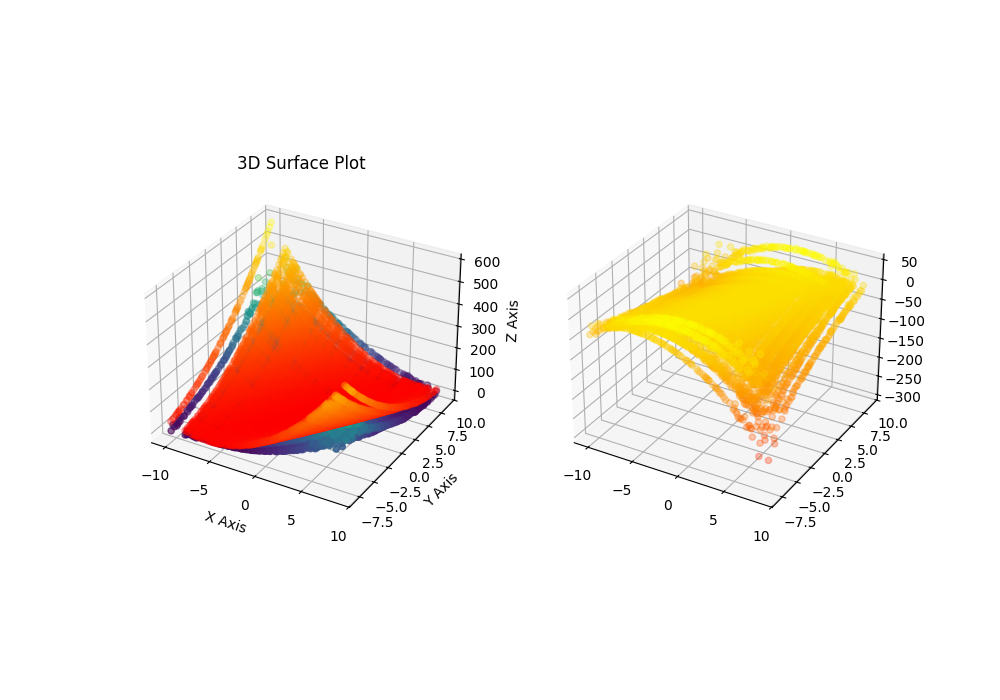

In [4]:
fig, ax = plot_V(q2v, q2v_x, q2v_y, V, t = 2, markovian=True, L = L, M = M)


In [5]:
q2v, v2q, mu_x, nu_y, q2v_x, v2q_x, q2v_y, v2q_y = quantization(adaptedX, adaptedY, markovian=False)
AW_2square, V = nested(mu_x, nu_y, v2q_x, v2q_y, q2v, markovian=False)
dist_bench = adapted_wasserstein_squared(A, B)
print("Theoretical AW_2^2: ", dist_bench)
print("Numerical AW_2^2: ", AW_2square)

Quantization ......
Number of distinct values in global quantization:  150
Number of condition subpaths of mu_x
Time 0: 1
Time 1: 57
Time 2: 820
Number of condition subpaths of nu_y
Time 0: 1
Time 1: 57
Time 2: 707
Nested backward induction .......


Timestep 0: 100%|██████████| 1/1 [00:00<00:00, 1136.36it/s]

Theoretical AW_2^2:  5.0
Numerical AW_2^2:  5.503795740994418


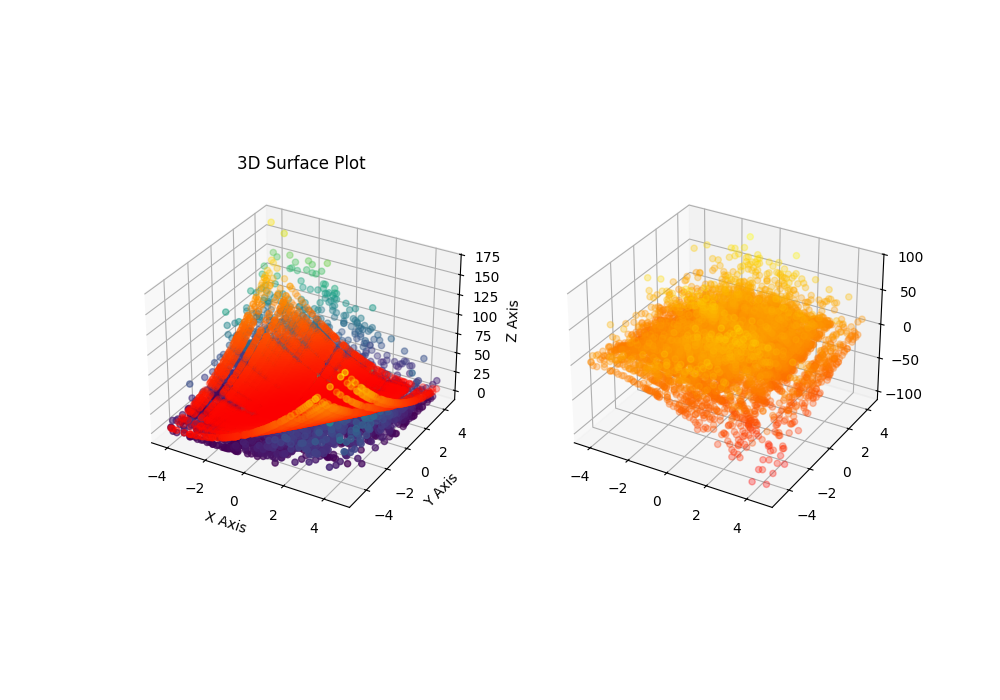

In [6]:
fig, ax = plot_V(q2v, q2v_x, q2v_y, V, t = 2, markovian=False, L = L, M = M)
